# Covariance and Correlation

Covariance measures how two variables change together. A positive covariance indicates that as one variable increases, the other tends to increase, while a negative covariance means they tend to move in opposite directions.

Correlation is a standardized version of covariance, indicating both the strength and direction of a linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation).

## Importing Libraries

In [3]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    print('Importing successful')
    
except ImportError:
    pass

Importing successful


## Import Data

In [4]:
df = pd.read_csv('cars_data.csv')
print('Data imported')


Data imported


In [5]:
df.head()

,manufacturer,model,year,engine_power,fuel_type,transmission,odometr,price,region,description,price_category
0,Chevrolet,Nexia 3,2022.0,1.5,Benzin,Avtomat,8500,12500.0,Tashkent,"2022 yil,\n \n ...",high
1,Chevrolet,Spark,2017.0,1.3,Gaz-benzin,Mexanika,300000,6500.0,Khorezm,"2017 yil,\n \n ...",low
2,Chevrolet,Gentra,2023.0,1.6,Benzin,Avtomat,23000,15800.0,Andijan,"2023 yil,\n \n ...",high
3,Mercedes-Benz,E 230,1985.0,1.8,Gaz-benzin,Mexanika,395000,5000.0,Namangan,"1985 yil,\n \n ...",low
4,Chevrolet,Lacetti,2010.0,1.8,Gaz-benzin,Avtomat,147000,7500.0,Tashkent,"2010 yil,\n \n ...",middle


In [7]:
df.dtypes

manufacturer       object
model              object
year              float64
engine_power      float64
fuel_type          object
transmission       object
odometr             int64
price             float64
region             object
description        object
price_category     object
dtype: object

In [10]:
df2 = df[['year', 'engine_power', 'odometr', 'price']]

In [12]:
df2.describe()

,year,engine_power,odometr,price
count,3647.000000,3657.000000,3.657000e+03,3657.000000
mean,2015.681656,1.553913,1.361803e+05,10159.757998
std,7.696581,0.623473,1.781281e+05,8037.630982
min,1958.000000,0.800000,0.000000e+00,434.000000
25%,2012.000000,1.300000,3.000000e+04,6000.000000
50%,2018.000000,1.500000,9.200000e+04,9000.000000
75%,2021.000000,1.600000,1.950000e+05,12600.000000
max,2024.000000,8.000000,4.011000e+06,199900.000000


## Covariance

In [14]:
covariance_matrix = df2.cov()
print(covariance_matrix)

                       year  engine_power       odometr         price
year              59.237357     -0.044721 -5.873807e+05  2.615293e+04
engine_power      -0.044721      0.388718 -7.078901e+03  2.197202e+03
odometr      -587380.699456  -7078.901438  3.172963e+10 -4.006408e+08
price          26152.927687   2197.202370 -4.006408e+08  6.460351e+07


The diagonal values, such as 59.24 for 'year' and 6.46×10 
7
  for 'price', represent the variance of each individual variable, showing their spread. Off-diagonal values indicate how two variables change together: for instance, the positive covariance of 2.62×10 
4
  between 'year' and 'price' suggests that newer cars tend to have higher prices. Conversely, the large negative covariance of −4.01×10 
8
  between 'odometr' and 'price' implies that as mileage increases, the price generally decreases, highlighting a strong inverse relationship in terms of their joint variability, though the magnitude is heavily influenced by the differing scales of the variables.

## Correlation

In [21]:
correlation_matrix = df2.corr()
print(correlation_matrix)

                  year  engine_power   odometr     price
year          1.000000     -0.009310 -0.428542  0.422353
engine_power -0.009310      1.000000 -0.063741  0.438455
odometr      -0.428542     -0.063741  1.000000 -0.279830
price         0.422353      0.438455 -0.279830  1.000000


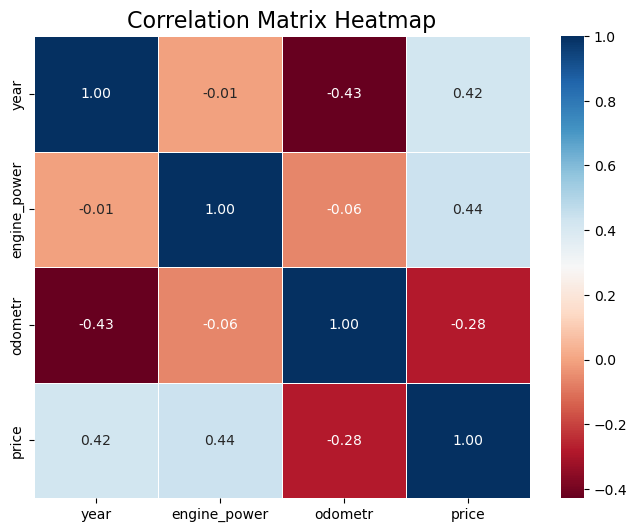

In [39]:
plt.figure(figsize=(8, 6)) # Adjust figure size as needed

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,      # Show the correlation values on the heatmap
    cmap='RdBu', # Color map: 'coolwarm' is good for showing positive/negative correlations
    fmt=".2f",       # Format the annotations to two decimal places
    linewidths=.5    # Add lines between cells
)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the plot
plt.show()